## Linear regression and KNN


## Load the data

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [162]:
os.getcwd()

'/Users/birukzewdie/Desktop/ALL UDEMY/ML-Python-Coursera'

In [6]:
df = pd.read_csv('FuelConsumption.csv')

## Data Exploration

Summary and structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [163]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## EDA : Explanatory Data Analysis
Let's create some simple plots to check out the data!

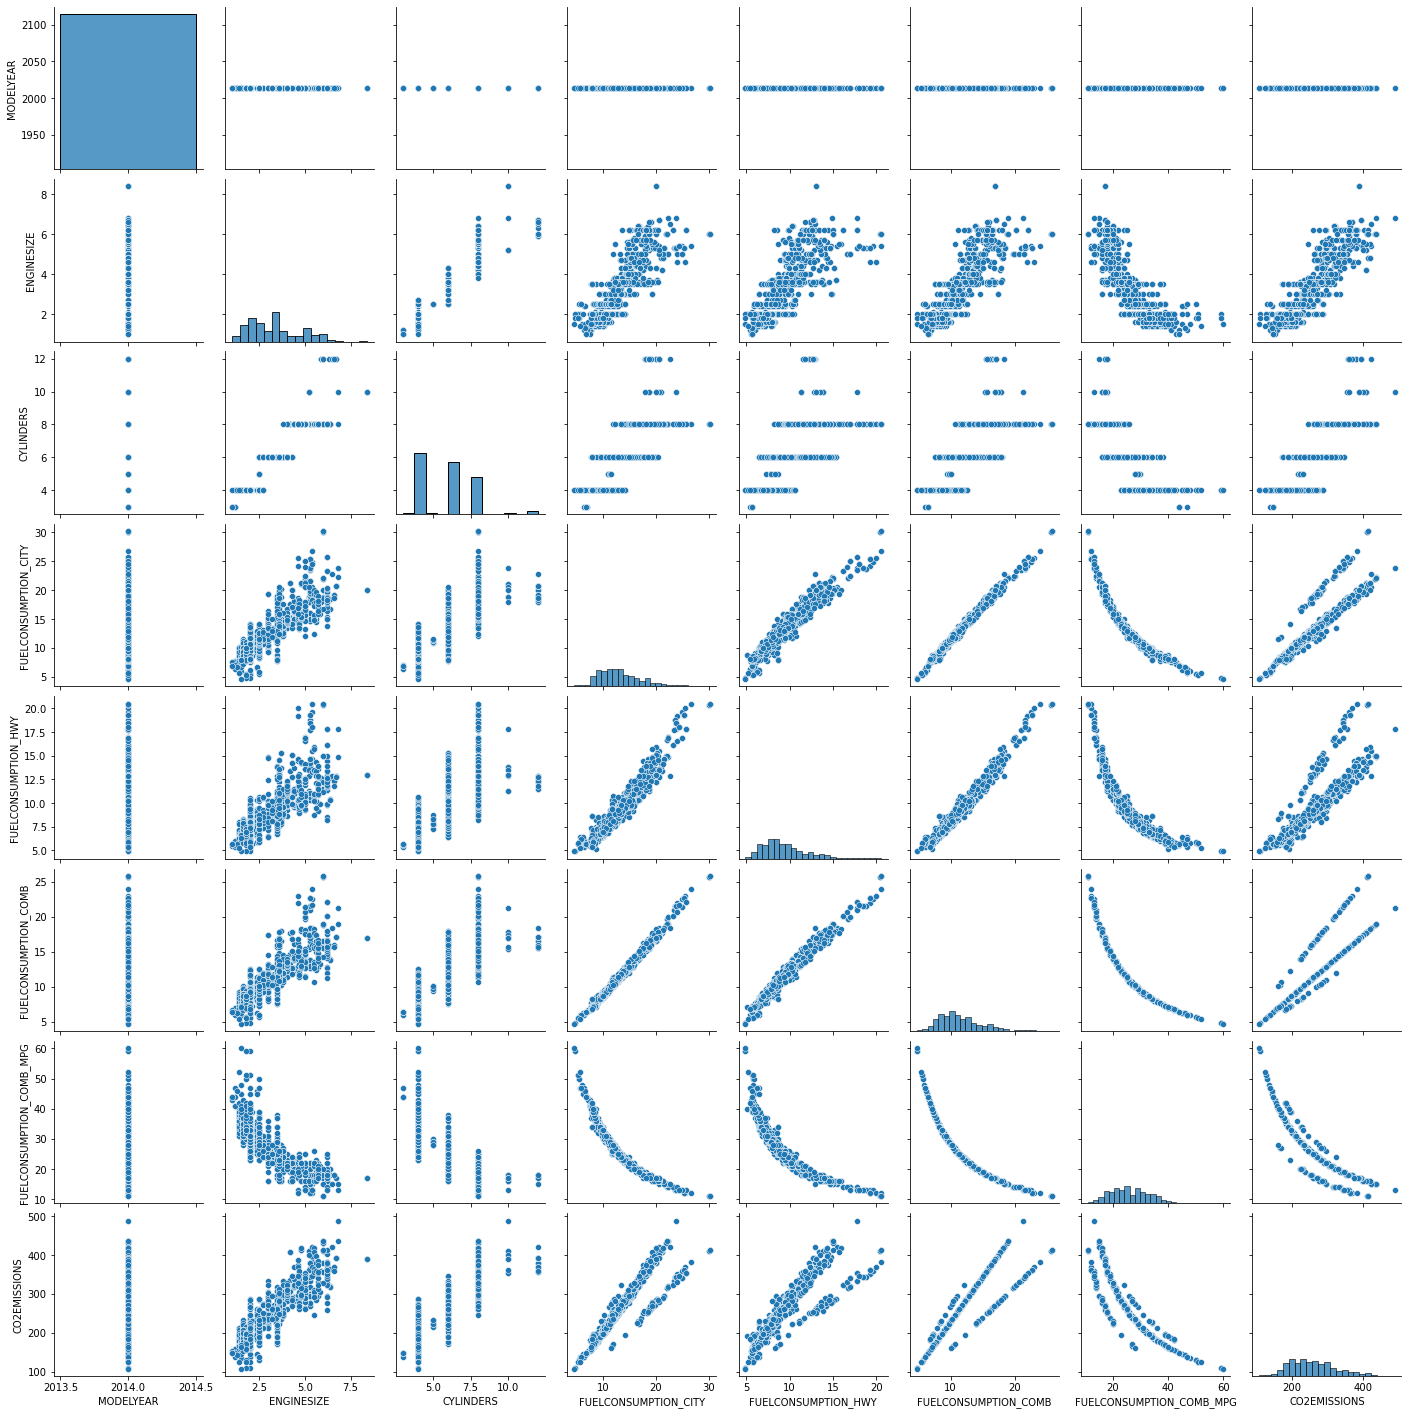

In [164]:
sns.pairplot(df)

In [10]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
## Just wanna keep small variables
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


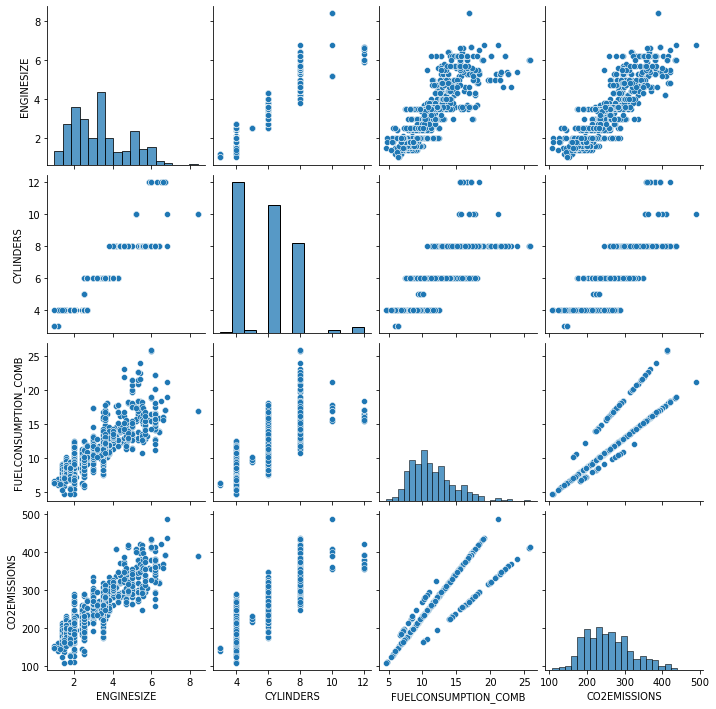

In [16]:
sns.pairplot(cdf)

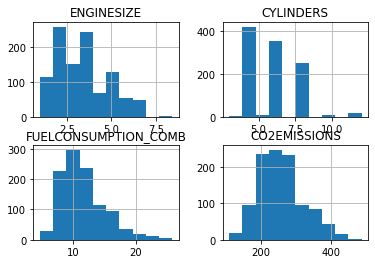

In [17]:
cdf.hist()
plt.show()

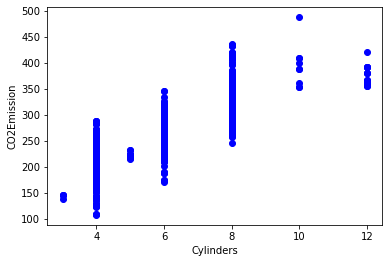

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='b')
plt.xlabel('Cylinders')
plt.ylabel('CO2Emission')
plt.show()

/Users/birukzewdie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

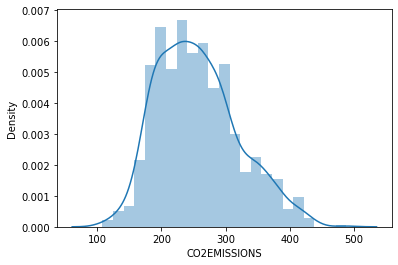

In [21]:
### Distribution of the Y LABELED OR OUTCOME

sns.distplot(cdf['CO2EMISSIONS'])

<AxesSubplot:>

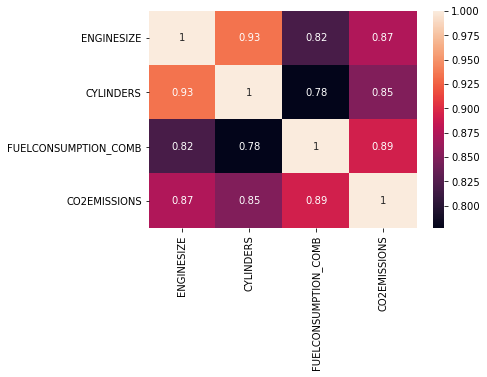

In [23]:
### See correlations: heat map

sns.heatmap(cdf.corr(), annot=True)
## High correlation > 0.5

## Training a Linear Regression Model


In [25]:
## x and y
X = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
Y = cdf[['CO2EMISSIONS']]

In [28]:
## Split train - test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=len(df))




In [31]:
from sklearn.linear_model import LinearRegression

### Train the data with the training portion of the data (80%)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [159]:
lm.intercept_

array([64.85669513])

In [158]:
coeff_df = pd.DataFrame(lm.coef_)
coeff_df

,0,1,2,3,4
0,10.410146,7.119861,3.572205,4.834575,1.026786


## Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [41]:
predictions = lm.predict(X_test)  ## train the model with train now apply the new dataset w/c is test data.

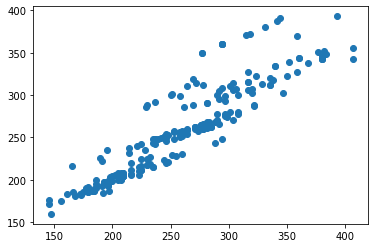

In [43]:
plt.scatter(y_test,predictions)    ## compare the actual and predicted

/Users/birukzewdie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


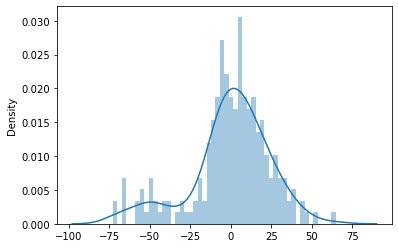

In [44]:
sns.distplot((y_test-predictions),bins=50);    ### residuals are actual y - predicted x

## Regression Evaluation Metrics

In [46]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print(np.mean(predictions - y_test)**2)
print('Variance score: ', lm.score(X, Y))

MAE: 17.867820466754985
MSE: 600.8566251251196
RMSE: 24.51237697827609
CO2EMISSIONS    0.180002
dtype: float64
Variance score:  0.8639034783110391


## Coursera new Multiple linear reg

In [49]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [51]:
cdf2 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
cdf2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244


In [73]:
## whats x and y?
x = cdf2[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y = cdf2[['CO2EMISSIONS']]

In [74]:
## train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=len(df))

In [75]:
## fit the taining data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

X_train.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'],
      dtype='object')

In [76]:
#### Model Evaluations

lm.intercept_
lm.coef_



array([[10.41014613,  7.11986085,  3.5722046 ,  4.83457549,  1.02678552]])

## K NN


In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import os
os.getcwd()

'/Users/birukzewdie/Desktop/ALL UDEMY/ML-Python-Coursera'

## Import data


In [89]:
dfk = pd.read_csv('telecust1000t.csv')
dfk.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Explore: 
* Summary 
* structure

In [83]:
dfk.info()  # structure of the var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [85]:
dfk.describe()  # Summary

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [87]:
dfk.custcat.value_counts()   

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

## EDA

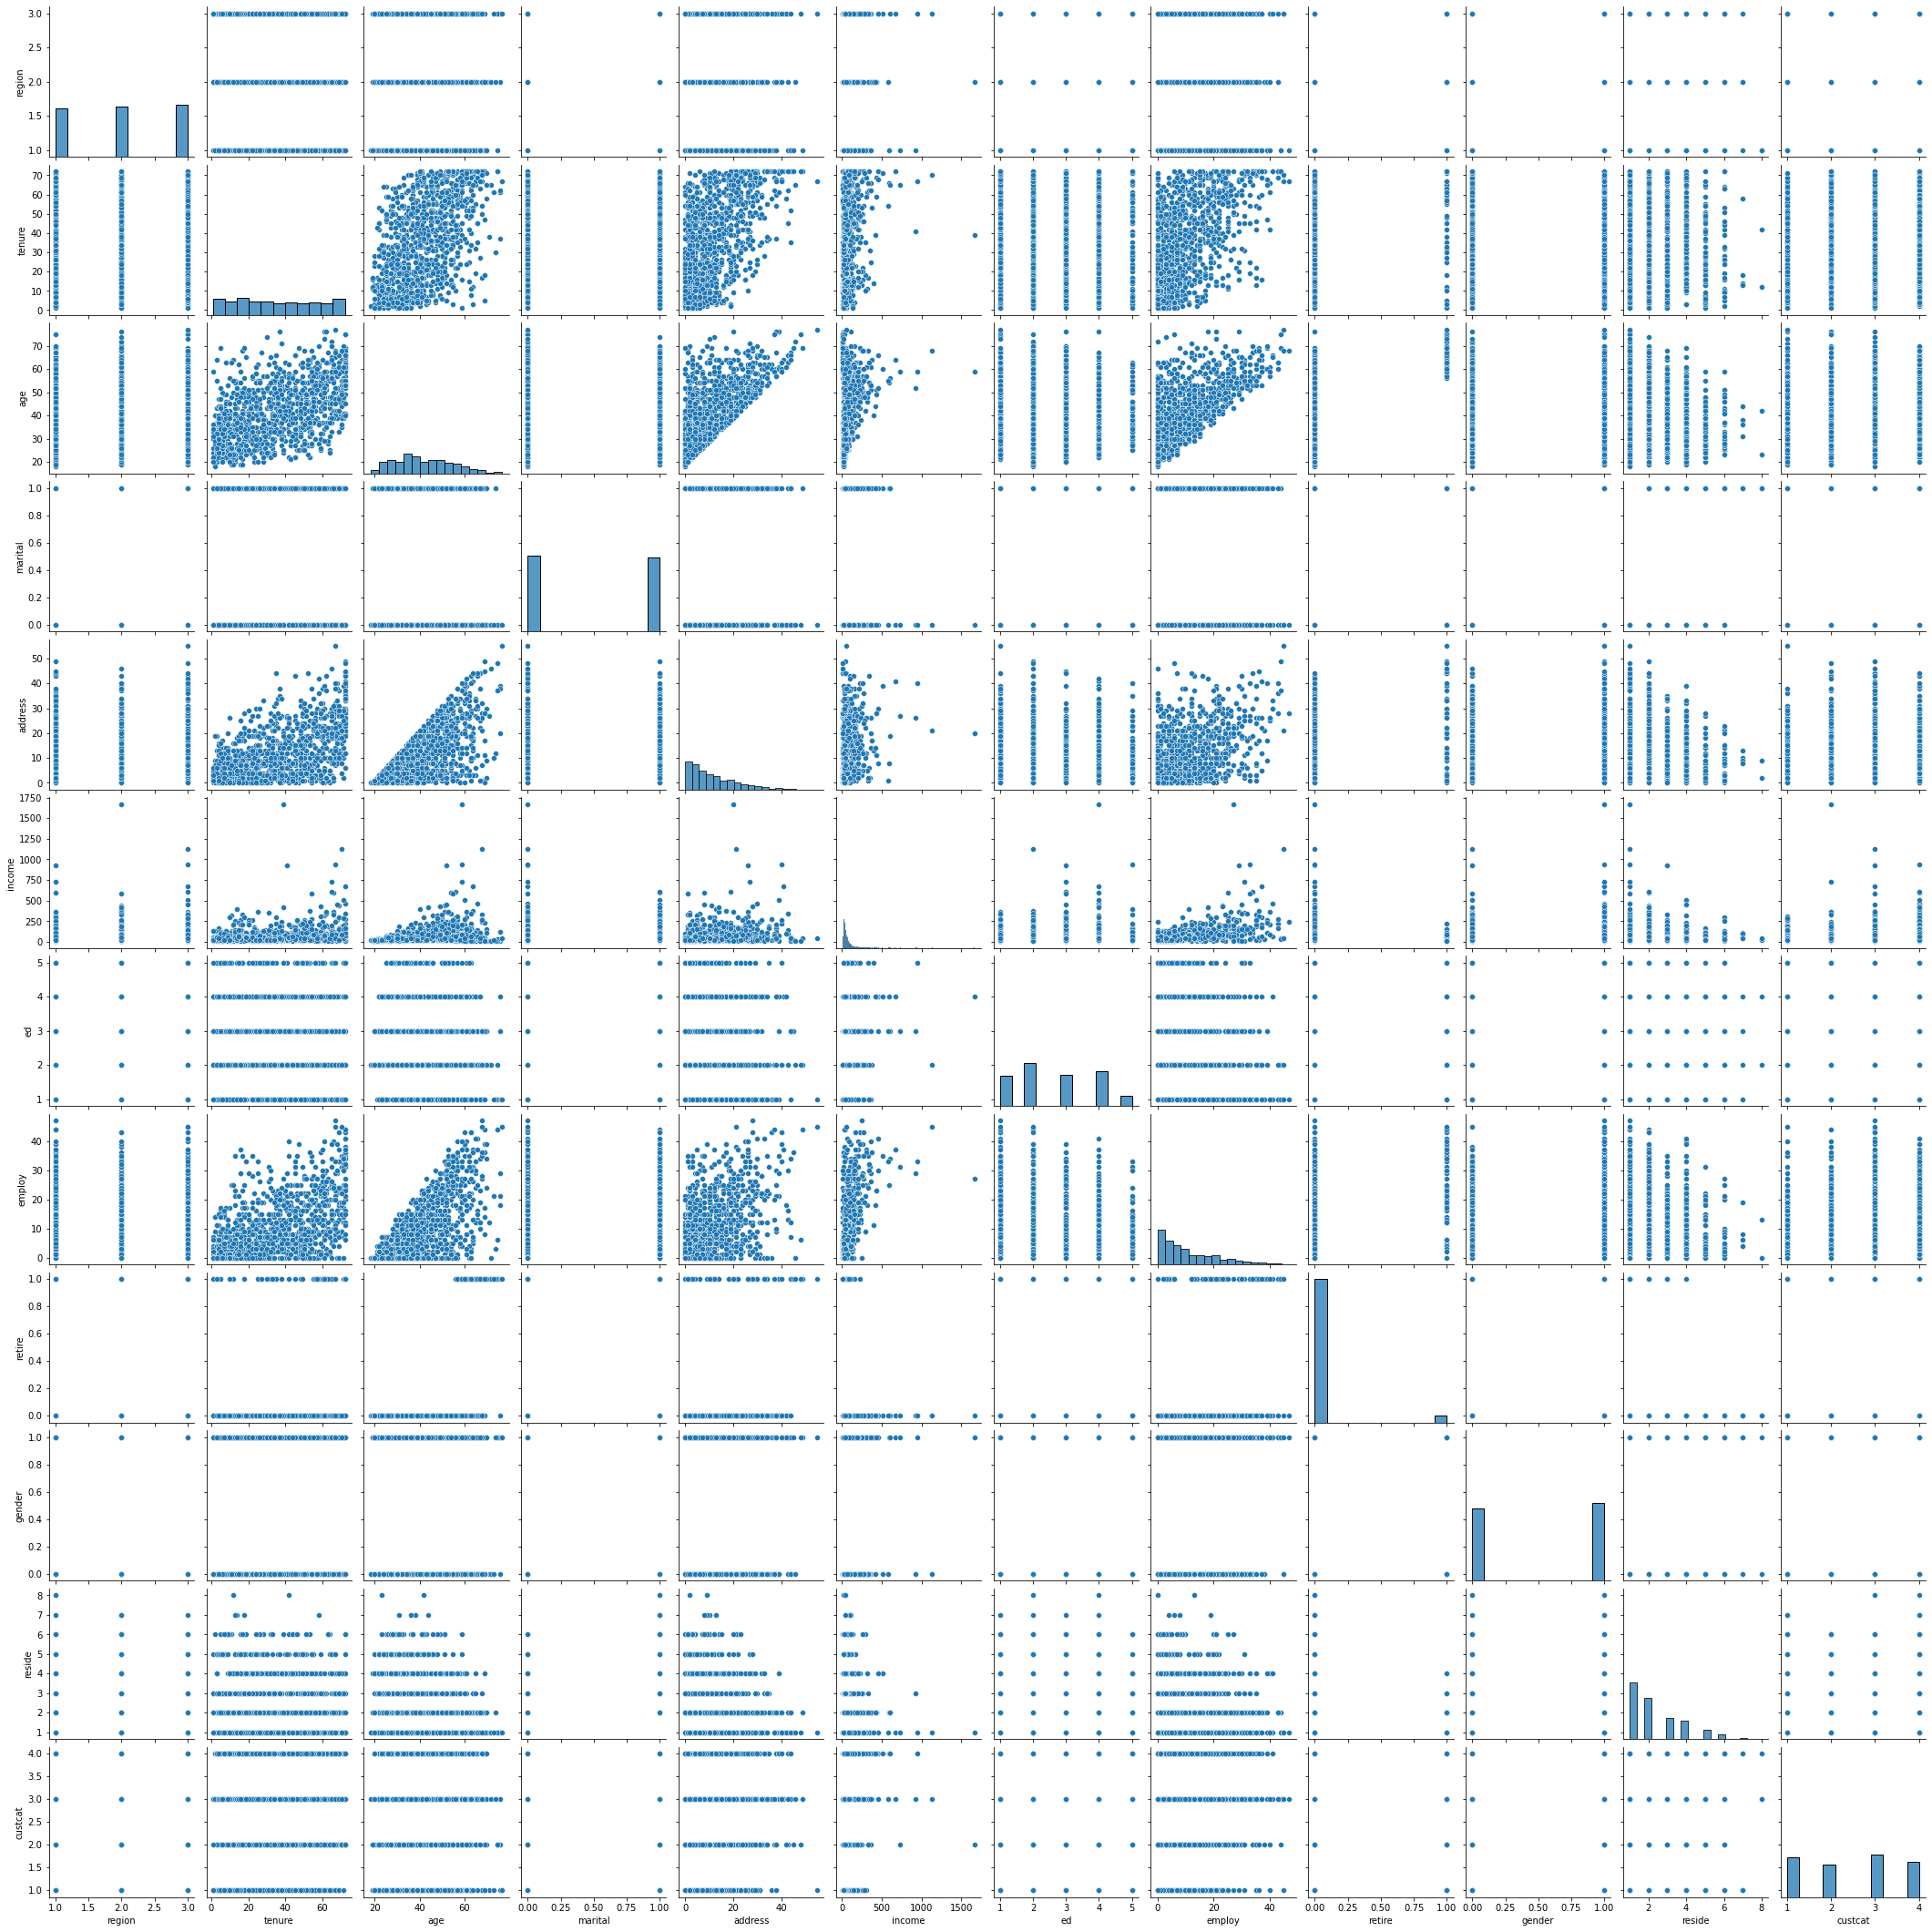

In [88]:
sns.pairplot(dfk)

## Standardize or Normalize

In [102]:
dfk.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [109]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(dfk.drop('custcat', axis = 1))


StandardScaler()

In [110]:
scaled_features = scale.transform(dfk.drop('custcat',axis=1))

In [113]:
new_df = pd.DataFrame(scaled_features, columns = dfk.columns[:-1])
new_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


## Train - Test split

* To increase our model's ability to predict an unknown dataset accuratly, we need to split the data into train/test.



In [122]:
## first what is X and y?
X = scaled_features
y = dfk['custcat']

from sklearn.model_selection import train_test_split
## lets do 80% training and 20 test   test size 0.2, random_state = anything
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## Fit KNN model

In [152]:
from sklearn.neighbors import KNeighborsClassifier
## lets start with k = 1
knn = KNeighborsClassifier(n_neighbors = 38)
#### Fit the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=38)

##  Use the built model to predict the X_test 
* Apply it to new unkown test data

In [153]:
pred = knn.predict(X_test)

##  Model Evaluation:
* confusion matrix: to find the recall and precision

In [154]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))

[[29  1 17  4]
 [ 8 13 14  9]
 [22  2 26  4]
 [21  5 11 14]]


In [155]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.36      0.57      0.44        51
           2       0.62      0.30      0.40        44
           3       0.38      0.48      0.43        54
           4       0.45      0.27      0.34        51

    accuracy                           0.41       200
   macro avg       0.45      0.41      0.40       200
weighted avg       0.45      0.41      0.40       200



In [150]:
error = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error')

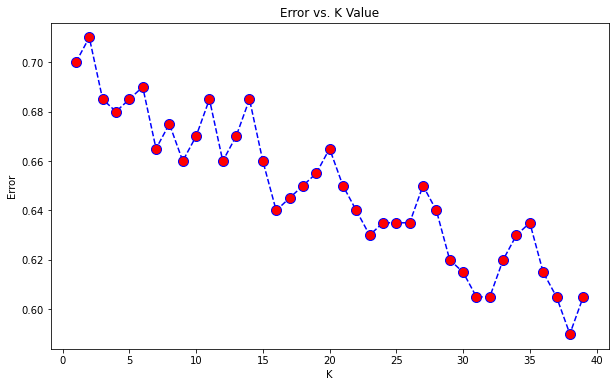

In [160]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')